# __Mathematical Model__

<br>

<div align="justify">
    The mathematical model approach requires an analysis process of the variables to know which one has a bigger influence. We start by importing the experimental data of the problem to solve, then we make an statistical study through a normal distribution graph and a Pareto chart. Finally, we evaluate different mathematical models and choose the one that adapts best.
</div>

In [1]:
%store -r Datos
%store -r current_dir
%store -r language
import sys
sys.path.insert(0, current_dir)

## Stability

<div align="justify">
    First, it is important to define the stability of the experiment.
</div>

In [2]:
from App.Pretratamiento.Estabilidad import Est
Estabilidad = Est(Datos, language)

Estab = Estabilidad()
%store Estab
Estab

Stored 'Estab' (dict)


{'Promedio': 2.9356,
 'Desvest': 0.33532587135501485,
 'CV [%]': 11.422737135679755,
 'Varianza': 0.14055429999999994}

## Experimental Cube

The experimental cube (for 2 and 3 variables only) can be seen by executing the next block of code.

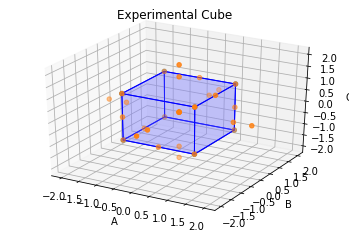

In [3]:
%matplotlib inline
from App.Pretratamiento.Cube import *
ExpCube(Datos, language)

<div align = "justify">
    It is important to make a discretization between the data used for the <i>model generation</i> and the remainig for the <i>model validation</i>.
</div>

<br>

<div align = "justify">
    The data used in the model generation are those seen in the experimental cube surface, while the model validation requires data from both inside and outside the experimental cube. In summary:
</div>

$$
\begin{equation}
  Generation=\left\{
    \begin{array}{@{} l c @{}}
      1 & \text{Upper level} \\
      0 & \text{Cube's center}\\
      -1 & \text{Lower level}
    \end{array}\right.
\end{equation}
$$

In [4]:
Data_Plant = Estabilidad.Plant
Data_Val = Estabilidad.Val

%store Data_Plant
%store Data_Val

Stored 'Data_Plant' (dict)
Stored 'Data_Val' (dict)


## Analysis of Variance (ANOVA)

<br>

<div align="justify">
    Next, we will see the behavior of the experimental data through a Normal Distirbution Graph and a Pareto chart. In the Pareto, you can specify the percentage of effect you want to calculate a model (0% will take no variable while 100% take them all).
</div>

Stored 'NormDist' (dict)


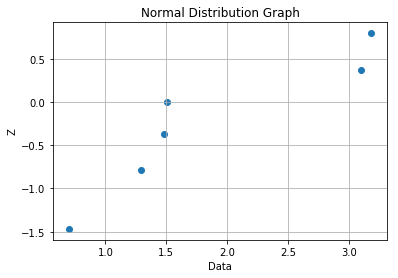

In [5]:
%matplotlib inline
from App.Pretratamiento.ANOVA import NormalGraph, Pareto
NormDist = NormalGraph(Data_Plant)()
%store NormDist

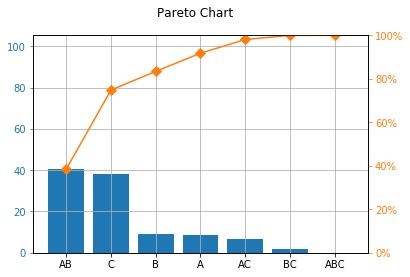

Variables: ('AB', 'C', 'B', 'A')


In [6]:
%matplotlib inline
#Verdadero = True    Falso = False
P = Pareto(Data_Plant, porcentaje = 95, grid=True)
Efecto = P.ef
print('Variables:', Efecto)

## __Mathematical Model Generation__

<br>

<div align="justify">
    At the <i>analysis of variance</i> section, we could see the variables with the biggest influence on the natural phenomena. In other words, it allows us to identify a starting point through the iterative calculation proccess. Thanks to technology, it is possible to evaluate hundreds (and even thousands) of mathematical models in a matter of minutes.
</div>

<br>

<div align="justify">
    But, before thinking of solving multiple models simultaneously, we should focus on generating and evaluating our first model.
</div>

### Problem Statement

<br> 

<div align="justify">
    The general model is of the type:
</div>

$$
\begin{equation}
    Y = b X
    \label{General}
    \tag{1}
\end{equation}
$$

Where $Y$ correspond to the response variable, $b$ to the constants and $X$ to the variables.

During the experimental experience, we obtained different response variables $\left( Y_{exp} \right)$, we already know our controlled variables $X$. We do not know the behavior of the constants, but we know that the mathematical model should be something like:

$$
\begin{equation}
    Y_{cal} = B_0 + B_1 X_1 + B_2 X_1 X_2 + B_3 X_3 ^2 + \dots
    \label{Desglosada}
    \tag{2}
\end{equation}
$$


In matrix terms, Equation \ref{Desglosada} is:

$$
\begin{equation}
    b = \left( X^T X \right) ^{-1} Y_{exp}
    \label{Const}
    \tag{3}
\end{equation}
$$

### Estimation Error

The developed model has an intern error, which can be estimated through the calculation of the determination coeficients $\left( R^2 \, y \, R^2 _{ajus} \right)$, which can be seen on Equations \ref{R2} y \ref{R2aju}.

$$
\begin{equation}
    R^2 = \frac{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2 - \sum _{i=1} ^n \left(Y_i - Y_{cal _i} \right)^2}{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2 }
    \label{R2}
    \tag{4}
\end{equation}
$$

$$
\begin{equation}
    R^2 _{ajus} = \frac{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2/GL_{exp} - \sum _{i=1} ^n \left(Y_i - Y_{cal _i} \right)^2 /GL_{cal}}{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2 /GL_{exp}}
    \label{R2aju}
    \tag{5}
\end{equation}
$$

Where: $Y_i$ is the experimental response variable of $i$, $n$ is the total number of experiments, $\bar{Y}_{exp}$ correspond to the mean value of all the experimental response variables, $Y_{cal_i}$ is the model response for the conditions given by $i$, $GL_{exp}$ is the number of freedom degrees of the experiment and $GL_{cal}$ is the number of freedom degrees of the model (see Equations \ref{GLexp} and \ref{GLcal}).

$$
\begin{equation}
    GL_{exp} = n-1
    \label{GLexp}
    \tag{6}
\end{equation}
$$

$$
\begin{equation}
    GL_{cal} = n-m-1
    \label{GLcal}
    \tag{7}
\end{equation}
$$


### Initial Models

<br>

<div align="justify">
    The initial models correspond to all the posible combinations of the variables selected by the <i>Pareto Chart</i>, in the section "Analysis of Variance".
</div>

In [7]:
from App.Modelos.Planteamiento import ModelosIniciales, ModeloFinal
from App.Modelos.Respuesta import *
nombre_bd = 'base'
P = ModelosIniciales(Data_Plant, NormDist, Efecto, nombre_bd)
Iniciales = P.Mejores
Mejor = P.Mejor
%store nombre_bd

Stored 'nombre_bd' (str)


In [8]:
for key in Iniciales:
    print('Modelo ' + str(key) + ':')
    Models(Iniciales[key])

Modelo 1:


Modelo 2:


Modelo 3:


Modelo 4:


Modelo 5:


Modelo 6:


Modelo 7:


Modelo 8:


Modelo 9:


Modelo 10:


Modelo 11:


Modelo 12:


Modelo 13:


Modelo 14:


Modelo 15:


#### Best initial Model

The base model selected is:

In [9]:
Models(Mejor)

## __Final Model__

The base model correspond to the best model with exponent 1. Now, we are going to evaluate combinations with different exponents. The selected criteria $R ^2 _{ajus}$ is given manually.

In [10]:
#Ecuación a evaluar
Porcentaje = 1.1       #Recomendable: 0.85 - Visualizar < 1.0
Eq = Mejor['Ecuación']
Eq = ('C', 'A', 'AB', 'ABC')
Final = ModeloFinal(Eq, NormDist, ref = 0.95, Y = Data_Plant['Y'],\
                    maximo=2, db='db', Porcentaje=Porcentaje)

In [ ]:
#¿Quieres seleccionar el mejor modelo inicial?
Modelo = Mejor
%store Modelo

In [11]:
Modelo = Final.Ans
Models(Modelo)
%store Modelo

Stored 'Modelo' (dict)


### Graphic Results

<br>

<div align = "justify">
    The graphic results (Y vs Ycal and the Residue) can be appreciated next.
</div>

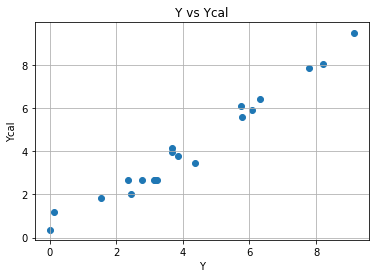

In [12]:
from App.Modelos.Resultados import *
Ys(Modelo, Data_Plant['Y'])

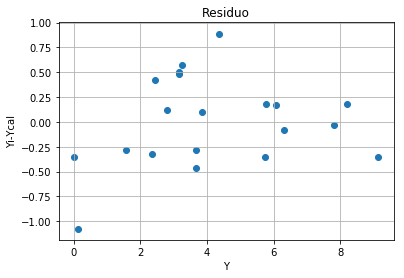

In [13]:
Residuo(Modelo, Data_Plant['Y'])

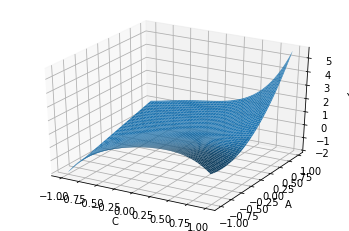

In [14]:
#Para ejemplo 1
limits = {
    'A':{
        '-1':-1,
        '1':1
    },
    'B':{
        '-1':1,
        '1':-1
    },
    'C':{
        '-1':-1,
        '1':1
    }
}

SuperficieRespuesta(Modelo, limits)

In [1]:
import ipywidgets as widgets
import subprocess
button = widgets.Button(description='Validation')
out = widgets.Output()
def on_button_clicked(b):
    with out:
        subprocess.run("jupyter lab validation.ipynb")

button.on_click(on_button_clicked)
widgets.VBox([button, out])